# PROBLEMA 1: Função com Derivada Numérica

## Objetivo
Implementar e plotar a função f(x) = c * (x^4 * sin(ax) * e^(-bx²)) / (1 + dx²) e calcular sua derivada usando diferenças finitas.

## Parâmetros
- a = 3.0
- b = 2.0  
- c = 10.0
- d = 2.0
- Intervalo: x ∈ [x₀, x₁]


In [67]:
# Definindo os parâmetros
a = 3.0
b = 2.0
c = 10.0
d = 2.0

h = 1e-6
# Definindo o intervalo
x0 = 0.0
x1 = 2.0

2.0

In [68]:
# Definindo a função f(x) = c * (x^4 * sin(ax) * e^(-bx²)) / (1 + dx²)
function f(x)
    numerator = c * x^4 * sin(a*x) * exp(-b*x^2)
    denominator = 1 + d*x^2
    return numerator / denominator
end


f (generic function with 1 method)

In [69]:
# Função para calcular a derivada usando diferenças finitas (método centrado)
function derivative_finite_diff(func, x, h)
    return (func(x + h) - func(x)) / (h)
end

# Função para calcular a derivada em um vetor de pontos
function derivative_vector(func, x_vec, h=h)
    n = length(x_vec)
    df_dx = zeros(n)
    
    for i in 1:n
        df_dx[i] = derivative_finite_diff(func, x_vec[i], h)
    end
    
    return df_dx
end


derivative_vector (generic function with 2 methods)

In [70]:
# Criando o vetor de pontos x no intervalo [x0, x1]
n_points = 1000
x = range(x0, x1, length=n_points)

# Calculando os valores da função
y = [f(xi) for xi in x]

# Calculando a derivada usando diferenças finitas
dy_dx = derivative_vector(f, x)


1000-element Vector{Float64}:
 2.9999999999835e-23
 2.411957989771163e-9
 3.856848466033444e-8
 1.9519032190662713e-7
 6.16713199950443e-7
 1.5051541131940937e-6
 3.1199242755492874e-6
 5.777588918812665e-6
 9.85157414409803e-6
 1.577182108263847e-5
 ⋮
 0.03362983276014239
 0.032977238879731974
 0.03233368604024095
 0.03169909972835713
 0.03107340518357024
 0.030456527436986333
 0.029848391288342727
 0.02924892138884104
 0.028658042215343182

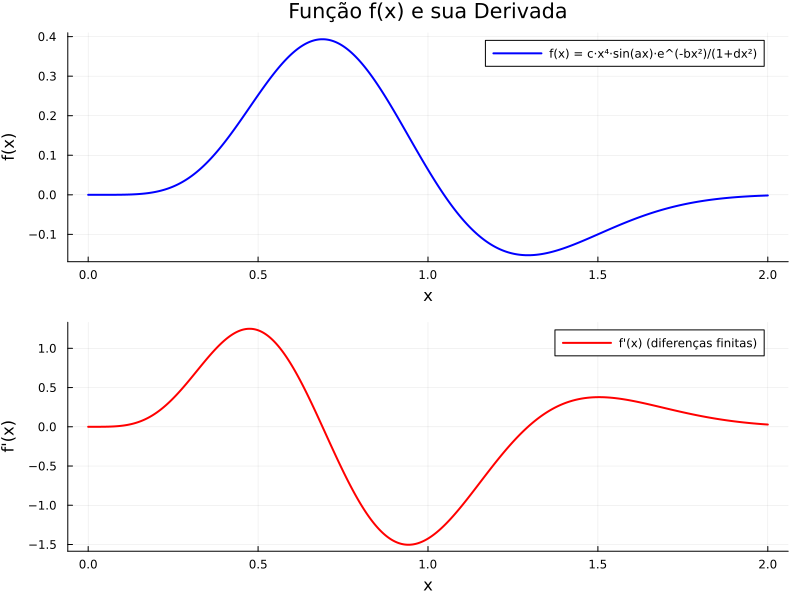

In [71]:
using Plots
# Plotando a função e sua derivada
plot1 = plot(x, y, 
             label="f(x) = c·x⁴·sin(ax)·e^(-bx²)/(1+dx²)", 
             linewidth=2, 
             color=:blue,
             title="Função f(x) e sua Derivada",
             xlabel="x",
             ylabel="f(x)",
             legend=:topright)

plot2 = plot(x, dy_dx, 
             label="f'(x) (diferenças finitas)", 
             linewidth=2, 
             color=:red,
             xlabel="x",
             ylabel="f'(x)",
             legend=:topright)

# Combinando os dois gráficos
plot_combined = plot(plot1, plot2, layout=(2,1), size=(800, 600))

display(plot_combined)
